In [1]:

import sys
sys.path.append('../b_Temporal_Stack')
import regionstack
import eotempstack
import xr_eotemp


In [2]:
saldana = regionstack.regionStack('Saldana', attrs=['S2','LC08'])

S2 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana/pre/
Reading 3 S2 stack files
Reading 9 hLC08 stack files
Harmonized Landsat-8 dataset was read


In [3]:
from matplotlib import pyplot as plt

In [1]:
from rasterio.plot import show
import numpy as np

def show_sentinel2_rgb(dataset,axis=None):
    band1 = (dataset.read(3,masked=True)-200)/1600.
    band2 = (dataset.read(2,masked=True)-200)/1600.
    band3 = (dataset.read(1,masked=True)-200)/1600.
    
    rgb = np.dstack([band1,band2,band3])
    return axis.imshow(rgb,animated=True,vmin=0.0,vmax=1.0)


[]

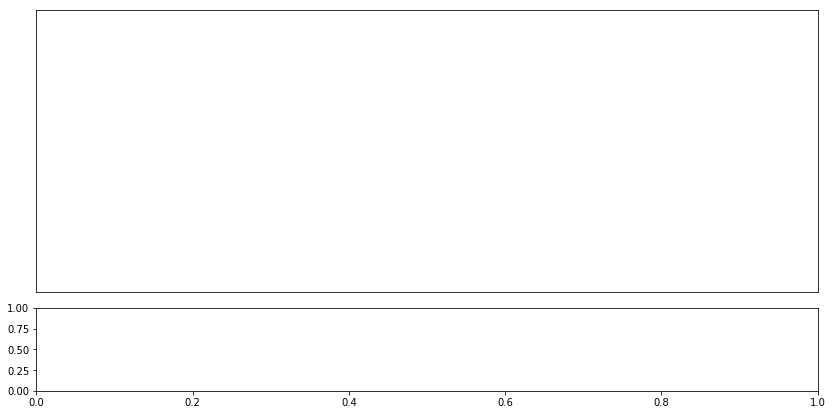

In [9]:
fig = plt.figure(figsize=(14, 7))
#fig.set_size_inches(size[0] / 100, size[1] / 100)
ax1=plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax2=plt.subplot2grid((4, 1), (3, 0))
ax1.set_xticks([])
ax1.set_yticks([])

In [2]:
%matplotlib inline

import rasterio
from IPython.display import HTML
from os import listdir
from os.path import isfile, join
import re
import matplotlib.animation as anim

#https://tomroelandts.com/articles/how-to-create-animated-gifs-with-python


In [ ]:

image_paths = [f for f in listdir("de_maat_rgb") if f.endswith("tiff") and isfile(join("de_maat_rgb", f))]
image_paths.sort()

size=(800, 300)
fig = plt.figure(figsize=(14, 7))
#fig.set_size_inches(size[0] / 100, size[1] / 100)
ax1=plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax2=plt.subplot2grid((4, 1), (3, 0))
ax1.set_xticks([])
ax1.set_yticks([])

images = []

for date in saldana.S2.time.values:
    
    plt_txt = ax1.text(0, 0, date, color='red',fontsize=12)
    
    plt_im = show_sentinel2_rgb(saldana.isel(x=slice(1100,1110),y=slice(1100,1110)).sel(time=date).values,ax1)
    
    graph, = ax2.plot(sentinel2_smooth.dropna())
    #point, = ax2.plot(date, filtered[date], 'g*')
    line =ax2.axvline(x=date,animated=True)
    images.append([plt_im,graph,line,plt_txt])
            #else:
            #    images.append([plt_im,graph])
            
animation = anim.ArtistAnimation(fig, images)
HTML(animation.to_jshtml())

In [14]:
saldana.S2

<xarray.Dataset>
Dimensions:  (time: 8, x: 2979, y: 3631)
Coordinates:
  * y        (y) float64 4.485e+05 4.484e+05 4.484e+05 4.484e+05 4.484e+05 ...
  * x        (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
  * time     (time) datetime64[ns] 2015-12-11 2015-12-21 2015-12-31 ...
    mask     (time, y, x) int8 dask.array<shape=(8, 3631, 2979), chunksize=(8, 1000, 1000)>
Data variables:
    blue     (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 1000, 1000)>
    green    (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 1000, 1000)>
    red      (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 1000, 1000)>
    nir      (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 1000, 1000)>
    swir1    (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 1000, 1000)>
    swir2    (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 1000, 1000)>
    NDVI     (time, y, x) f

In [3]:
import xarray as xr
import os

ndvi = xr.open_dataset(os.environ['WIN_SVR_DATA']+'Saldana/features/NDVI.nc')

In [4]:
ndvi

<xarray.Dataset>
Dimensions:  (time: 36, x: 2974, y: 3626)
Coordinates:
  * y        (y) float64 4.485e+05 4.484e+05 4.484e+05 4.484e+05 4.484e+05 ...
  * x        (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
  * time     (time) datetime64[ns] 2015-07-06 2015-07-14 2015-07-15 ...
Data variables:
    NDVI     (y, x, time) float32 ...

In [5]:
ndvi_orig = xr.open_dataset(os.environ['WIN_SVR_DATA']+'Saldana/vars/opt_NDVI.nc')

#ndvi_orig.NDVI.isel(x=slice(1100,2100),y=slice(1600,2600)).plot(col='time', col_wrap=6)

In [6]:
ndvi_orig.time.values[:-2]

array(['2015-06-29T00:00:00.000000000', '2015-07-15T00:00:00.000000000',
       '2015-07-31T00:00:00.000000000', '2015-08-16T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-09-17T00:00:00.000000000',
       '2015-10-03T00:00:00.000000000', '2015-10-19T00:00:00.000000000',
       '2015-11-04T00:00:00.000000000', '2015-11-20T00:00:00.000000000',
       '2015-12-06T00:00:00.000000000', '2015-12-11T00:00:00.000000000',
       '2015-12-21T00:00:00.000000000', '2015-12-22T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-01-07T00:00:00.000000000',
       '2016-01-10T00:00:00.000000000', '2016-01-20T00:00:00.000000000',
       '2016-01-23T00:00:00.000000000', '2016-01-30T00:00:00.000000000',
       '2016-02-08T00:00:00.000000000'], dtype='datetime64[ns]')

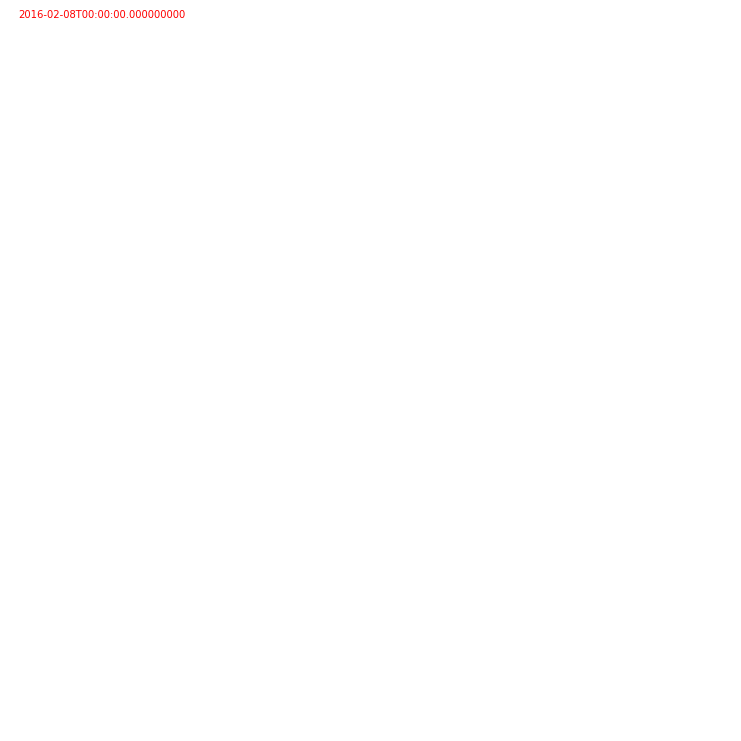

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
 
class AnimatedGif:
    def __init__(self, size=(640, 480)):
        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / 100, size[1] / 100)
        ax = self.fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
        ax.set_xticks([])
        ax.set_yticks([])
        self.images = []
 
    def add(self, image, label=''):
        plt_im = plt.imshow(image, cmap='RdYlGn', vmin=-1, vmax=1, animated=True)
        plt_txt = plt.text(10, 10, label, color='red')
        self.images.append([plt_im, plt_txt])
 
    def save(self, filename):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='imagemagick', fps=1)

m = 1000
n = 1000

animated_gif = AnimatedGif(size=(m, n))
#animated_gif.add(M, label='0')
#images = []

for date in ndvi_orig.time.values[:-2]:
    
    mask = ndvi_orig.mask.isel(x=slice(1100,2100),y=slice(1600,2600)).sel(time=date)
    M = ndvi_orig.NDVI.isel(x=slice(1100,2100),y=slice(1600,2600)).sel(time=date).where(mask).values
    
    #M = ndvi.NDVI.sel(time=date).isel(x=slice(1100,2100),y=slice(1600,2600)).values
    
    animated_gif.add(M, label=date)

animated_gif.save('ndvi-orig-animated.gif')